In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import keras 
from  keras.datasets import mnist
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout


## IMPORTING THE DATA AND PRE-PROCESSING

In [29]:

(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [30]:
def plot_input_img(i):
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.show()

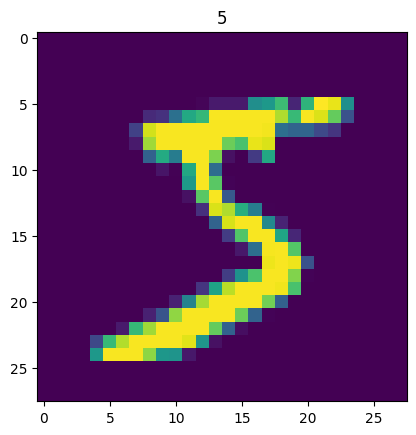

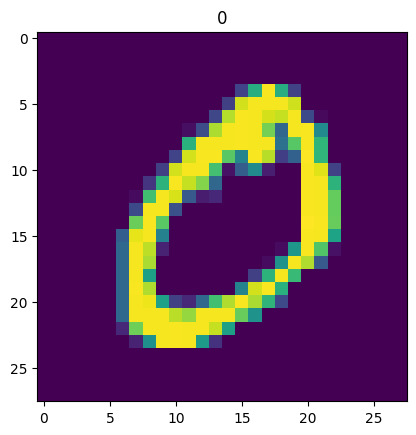

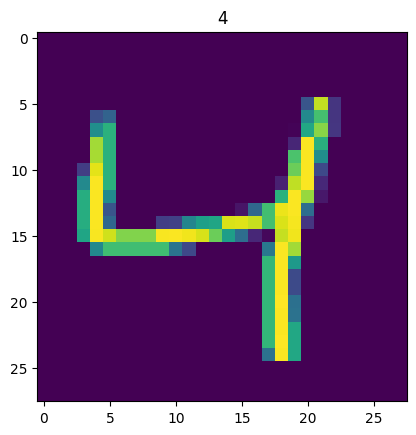

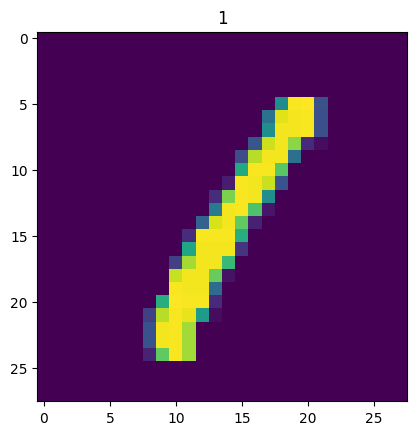

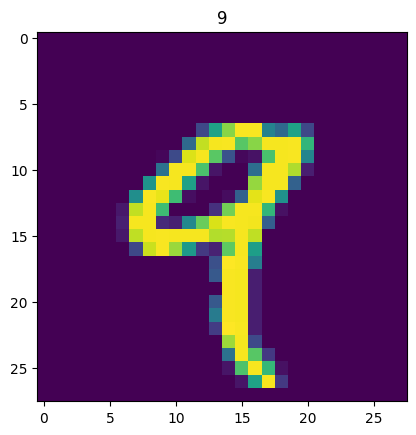

In [31]:
for i in range(5):
    plot_input_img(i)


# #PRE PROCESS THE IMAGES


In [32]:
#Normalizing the image to [0,1]  range
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

# REshape / expand the dimentions of imags to (28,28,1)
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [33]:
#Convert the class to one hot vector 

Y_train=keras.utils.to_categorical(Y_train)
Y_test=keras.utils.to_categorical(Y_test)

In [34]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [37]:
#Callbacks
from keras.callbacks import EarlyStopping , ModelCheckpoint

#Earlystopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,mode='max',patience=3,verbose=1)

#Model check point
mc=ModelCheckpoint("./bestmodel.keras",monitor="val_accuracy",verbose=1,save_best_only=True)
cb=[es,mc]

In [38]:
model.fit(X_train,Y_train,epochs=50,validation_split=0.3,callbacks=cb)
model.save('models.h5')

Epoch 1/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8488 - loss: 0.4738
Epoch 1: val_accuracy improved from -inf to 0.97500, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8490 - loss: 0.4734 - val_accuracy: 0.9750 - val_loss: 0.0801
Epoch 2/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9763 - loss: 0.0795
Epoch 2: val_accuracy improved from 0.97500 to 0.98228, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9763 - loss: 0.0795 - val_accuracy: 0.9823 - val_loss: 0.0562
Epoch 3/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9820 - loss: 0.0558
Epoch 3: val_accuracy improved from 0.98228 to 0.98317, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9820 - loss: 0.0558 - val_accuracy: 0.9832 - val_loss: 0.0535
Epoch 4/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9857 - loss: 0.0459
Epoch 4: val_accuracy i

In [39]:
model_s=keras.models.load_model('E:\Digit Recognition\models.h5')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\VISHESH\AppData\Local\Temp\ipykernel_19344\2467120454.py:1: SyntaxWarning: invalid escape sequence '\D'
  model_s=keras.models.load_model('E:\Digit Recognition\models.h5')


In [40]:
loss,accuracy=model_s.evaluate(X_test,Y_test)
print(f'The Model Accuracy is {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0407
The Model Accuracy is 0.9890000224113464
